In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/100-most-watched-anime-in-the-world/most_watched_anime_dataset_100_entries.csv


## 🌍📊 Exploratory Data Analysis of Global Anime Popularity Dataset 🎥⭐  

## 📌 **Notebook Overview**  
This notebook dives into the fascinating world of anime by analyzing a dataset containing the most-watched anime in various countries. We will explore the dataset through visualization, data cleaning, outlier detection, and analysis of key trends. Each feature in the dataset will be thoroughly examined to uncover insights about global anime preferences, ratings, budgets, and more.  

---

## 📝 **Feature Summaries with Emojis**  

### 🎥 **Anime Name**  
The title of the anime that has gained the most viewership in a particular country. This feature helps us identify which anime is popular in different parts of the world.  

### 🌍 **Most Watched in Country**  
This shows the country where each anime is the most popular. It provides insights into regional anime preferences, helping us understand global viewership patterns.  

### ⭐ **Ratings**  
The average user rating (on a scale of 1 to 10) for the anime. This feature tells us how well the anime is received by its viewers and can indicate its overall success.  

### 🎬 **Number of Episodes**  
The total number of episodes produced for the anime. It helps to explore whether long-running shows are more popular compared to short series.  

### 🏢 **Animation Studio Name**  
The studio responsible for producing the anime. Identifying these studios allows us to see which production houses dominate the anime world.  

### 💵 **Budget (in Million USD)**  
The estimated production budget for the anime, in millions of U.S. dollars. Analyzing this feature reveals the financial investments behind the most successful anime.  

### 📅 **Release Year**  
The year the anime was first released or aired. This helps us track when anime was produced and whether older or newer anime dominates global popularity.  

### 🎭 **Genre**  
The primary genre of the anime (e.g., action, fantasy, drama). This feature is useful for understanding the diversity of anime content and the genres that are most appealing to viewers.  

### ⏱️ **Duration per Episode (minutes)**  
The average length of each episode in minutes. This feature shows the runtime of the anime and whether shorter or longer episodes are more popular.  

---

## 🔥 **Discussion Starter: What's Your Favorite Anime?**  
My favorite anime is **Attack on Titan** 🏆🔥. The intense storytelling, character development, and deep themes make it a masterpiece! What about you? What’s your favorite anime and why? Let’s discuss in the comments!  

---

## 🏆 **Key Questions to Explore:**  
- What are the most highly-rated anime across different countries?  
- Does a higher budget result in better ratings?  
- Which genres are the most popular worldwide?  
- Do long-running anime get higher ratings compared to shorter series?  
- Which animation studios consistently produce top-rated anime?  

Stay tuned as we uncover fascinating insights with visualizations and analysis! 🚀  


## Importing Necessary Libraries

- **pandas** (`pd`) → For data manipulation and analysis.  
- **numpy** (`np`) → For numerical computations.  
- **matplotlib.pyplot** (`plt`) → For static data visualization.  
- **seaborn** (`sns`) → For statistical data visualization.  
- **plotly.express** (`px`) → For interactive visualizations.  


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Loading the Dataset

- Using **pandas** to read the dataset from a CSV file.  
- The dataset **"100 Most Watched Anime in the World"** is loaded into a DataFrame (`df`).  

In [3]:
# Load the dataset
df = pd.read_csv("/kaggle/input/100-most-watched-anime-in-the-world/most_watched_anime_dataset_100_entries.csv")

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 9 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Anime Name                      90 non-null     object 
 1   Most Watched in Country         90 non-null     object 
 2   Ratings                         90 non-null     float64
 3   Number of Episodes              90 non-null     float64
 4   Animation Studio Name           90 non-null     object 
 5   Budget (in Million USD)         90 non-null     float64
 6   Release Year                    90 non-null     float64
 7   Genre                           90 non-null     object 
 8   Duration per Episode (minutes)  90 non-null     float64
dtypes: float64(5), object(4)
memory usage: 7.2+ KB


In [5]:
df.shape

(100, 9)

In [6]:
df.describe()

,Ratings,Number of Episodes,Budget (in Million USD),Release Year,Duration per Episode (minutes)
count,90.000000,90.000000,90.000000,90.000000,90.000000
mean,8.222222,250.722222,74.260778,2005.133333,39.888889
std,1.114035,138.047462,43.209005,9.967588,12.466084
min,6.200000,12.000000,5.820000,1990.000000,20.000000
25%,7.200000,131.500000,38.220000,1995.500000,29.250000
50%,8.200000,275.000000,67.270000,2005.500000,39.000000
75%,9.350000,360.000000,110.827500,2014.000000,52.000000
max,10.000000,499.000000,149.390000,2022.000000,59.000000


### Data Quality Check

- **Check for Missing Values**: Identifies the number of null values in each column.  
- **Check for Duplicates**: Counts the number of duplicate rows in the dataset.  
- **Check Data Types**: Displays the data type of each column. 

In [7]:
# Check for missing values
missing_values = df.isnull().sum()

# Check for duplicates
duplicate_rows = df.duplicated().sum()

# Check data types
data_types = df.dtypes

missing_values, duplicate_rows, data_types

(Anime Name                        10
 Most Watched in Country           10
 Ratings                           10
 Number of Episodes                10
 Animation Studio Name             10
 Budget (in Million USD)           10
 Release Year                      10
 Genre                             10
 Duration per Episode (minutes)    10
 dtype: int64,
 0,
 Anime Name                         object
 Most Watched in Country            object
 Ratings                           float64
 Number of Episodes                float64
 Animation Studio Name              object
 Budget (in Million USD)           float64
 Release Year                      float64
 Genre                              object
 Duration per Episode (minutes)    float64
 dtype: object)

In [8]:
# Fill missing numerical values with median
num_cols = ['Ratings', 'Number of Episodes', 'Budget (in Million USD)', 'Release Year', 'Duration per Episode (minutes)']
df[num_cols] = df[num_cols].apply(lambda col: col.fillna(col.median()))

# Fill missing categorical values with "Unknown"
cat_cols = ['Anime Name', 'Most Watched in Country', 'Animation Studio Name', 'Genre']
df[cat_cols] = df[cat_cols].fillna('Unknown')

# Convert numerical columns to integers where appropriate
df['Number of Episodes'] = df['Number of Episodes'].fillna(0).astype(int)
df['Release Year'] = df['Release Year'].fillna(0).astype(int)

# Verify changes
print(df.info())  # Check data types
print(df.isnull().sum())  # Confirm no missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 9 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Anime Name                      100 non-null    object 
 1   Most Watched in Country         100 non-null    object 
 2   Ratings                         100 non-null    float64
 3   Number of Episodes              100 non-null    int64  
 4   Animation Studio Name           100 non-null    object 
 5   Budget (in Million USD)         100 non-null    float64
 6   Release Year                    100 non-null    int64  
 7   Genre                           100 non-null    object 
 8   Duration per Episode (minutes)  100 non-null    float64
dtypes: float64(3), int64(2), object(4)
memory usage: 7.2+ KB
None
Anime Name                        0
Most Watched in Country           0
Ratings                           0
Number of Episodes                0
Animation Studi

- **Bar Plot Details**:  
  - Displays the **Top 10 Highest Rated Anime**.  
  - Uses `sns.barplot()` with the **'viridis'** color palette.  
  - X-axis limited to **0-10** (assuming ratings are within this range).  
  - Labels and title added for clarity.  

## Scatter Plot: Budget vs Ratings  

- **Objective**:  
  - Visualize the relationship between **Budget (in Million USD)** and **Ratings**.  
  - Identify trends, outliers, or clusters in anime spending and ratings.  

- **Visualization Details**:  
  - **Scatter plot** using **Seaborn (`sns.scatterplot`)**.  
  - **Hue (`Genre`)**: Colors points by genre for better distinction.  
  - **Palette (`coolwarm`)**: Enhances visual clarity.  
  - **Alpha (`0.7`)**: Adjusts transparency to avoid overlap.  
  - **Grid Enabled (`plt.grid(True)`)** for readability.  

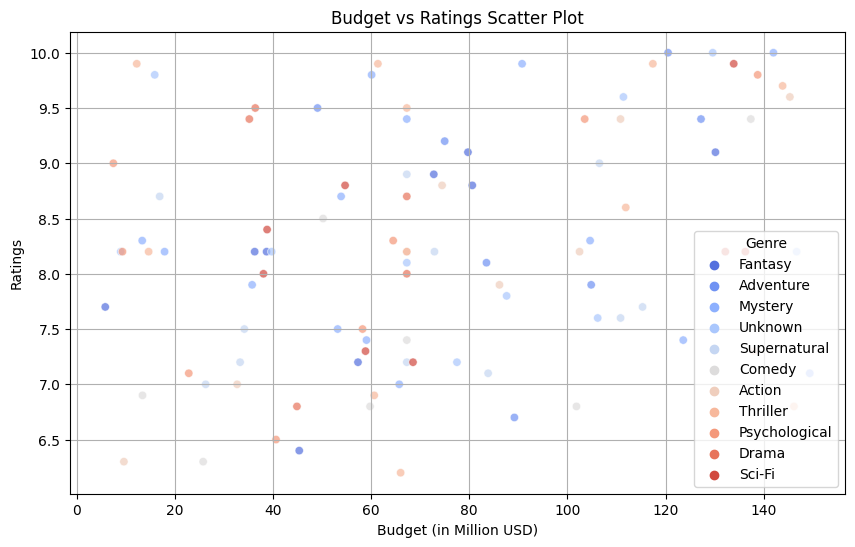

In [9]:
# Scatter plot of Budget vs Ratings
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['Budget (in Million USD)'], y=df['Ratings'], hue=df['Genre'], palette='coolwarm', alpha=0.7)
plt.xlabel('Budget (in Million USD)')
plt.ylabel('Ratings')
plt.title('Budget vs Ratings Scatter Plot')
plt.grid(True)
plt.show()

## Count Plot: Most Common Anime Genres  

- **Objective**:  
  - Visualize the frequency of different anime genres in the dataset.  

- **Plot Details**:  
  - Used `sns.countplot()` to display genre distribution.  
  - Sorted genres by frequency using `order=df['Genre'].value_counts().index`.  
  - Applied the **'magma'** color palette for visual appeal.  
  - Labeled axes and added a title for clarity.  

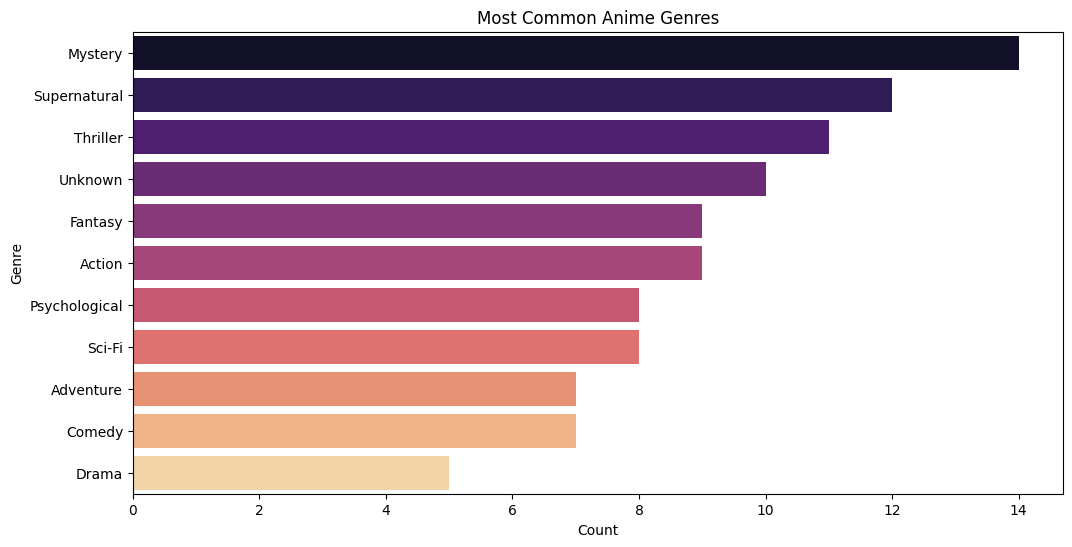

In [10]:
# Count plot for most common genres
plt.figure(figsize=(12, 6))
sns.countplot(y=df['Genre'], order=df['Genre'].value_counts().index, palette='magma')
plt.xlabel('Count')
plt.ylabel('Genre')
plt.title('Most Common Anime Genres')
plt.show()

## Correlation Heatmap of Numerical Features  

- **Objective**:  
  - Visualize correlations between numerical features in the dataset.  

- **Data Selection**:  
  - Used `df.select_dtypes(include=['number'])` to filter only numerical columns.  

- **Heatmap Details**:  
  - Used `sns.heatmap()` for visualization.  
  - **`annot=True`**: Displays correlation values in each cell.  
  - **Color Map (`cmap='coolwarm'`)**: Enhances visual contrast.  
  - **Formatting (`fmt=".2f"`)**: Rounds values to 2 decimal places.  
  - **Line widths (`linewidths=0.5`)**: Adds subtle grid separation.

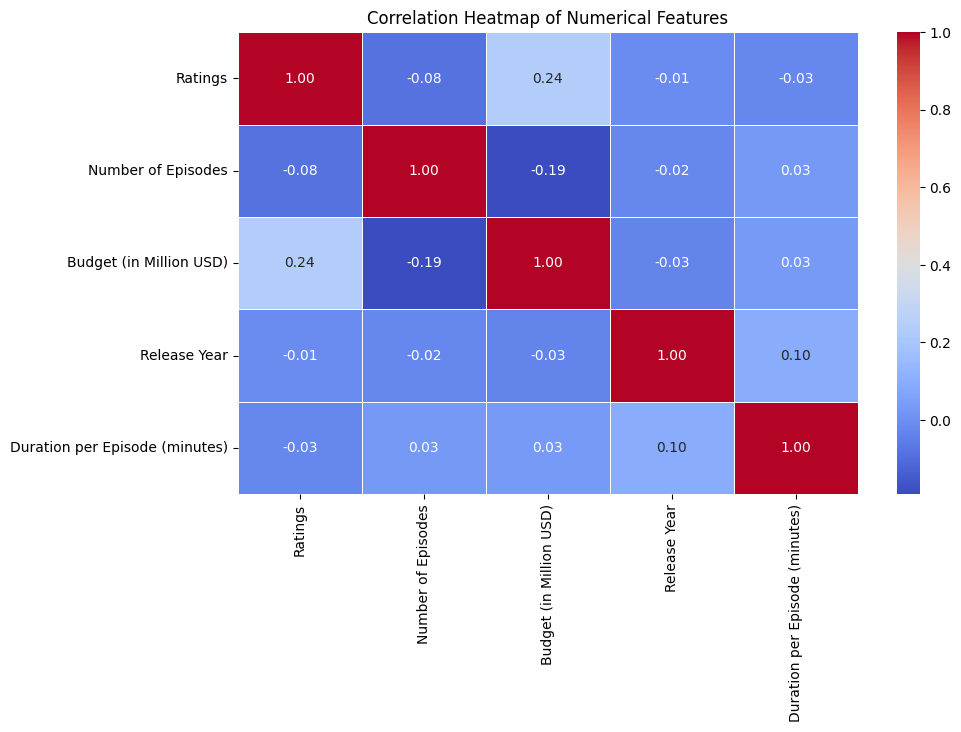

In [11]:
# Select only numerical columns
numeric_df = df.select_dtypes(include=['number'])

# Correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

## Pie Chart: Genre Distribution of Most Watched Anime  

- **Objective**:  
  - Visualize the percentage of different anime genres in the dataset.  


- **Plot Details**:  
  - **Labels (`labels=genre_counts.index`)**: Displays genre names.  
  - **Autopct (`'%1.1f%%'`)**: Shows percentages with one decimal place.  
  - **Start Angle (`startangle=140`)**: Rotates the chart for better readability.  
  - **Color Palette (`sns.color_palette('pastel')`)**: Uses soft pastel colors.  
  - **`plt.axis('equal')`**: Ensures the pie chart is circular.  


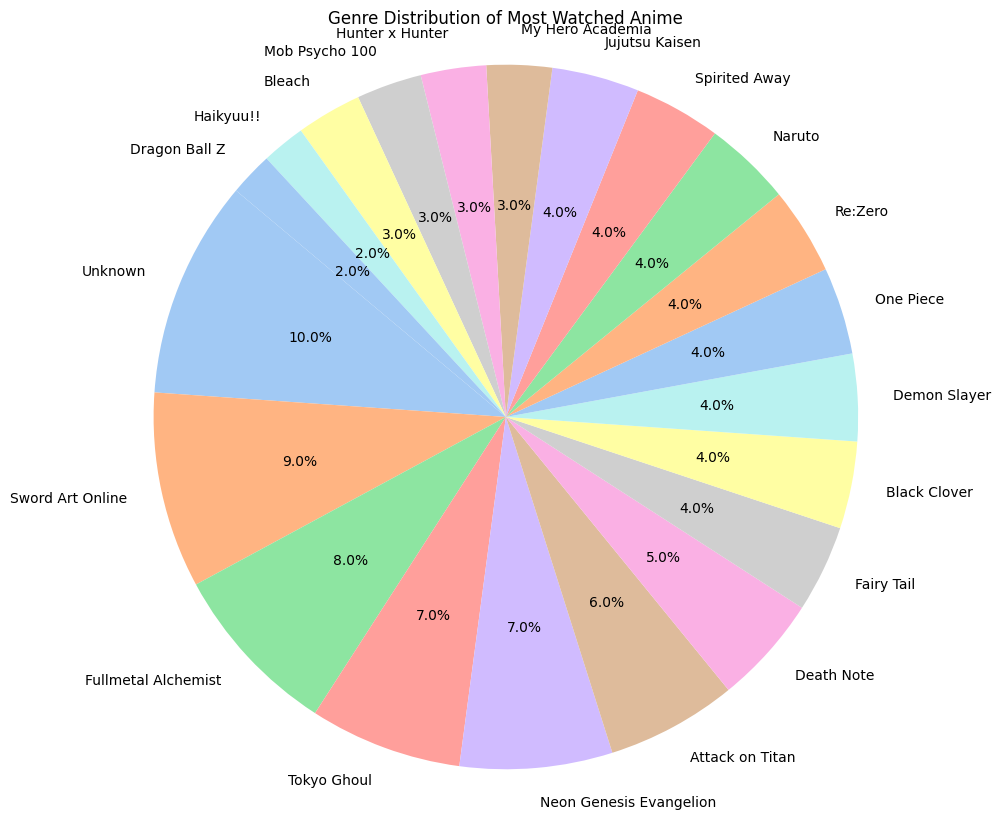

In [12]:
plt.figure(figsize=(10, 10))
genre_counts = df['Anime Name'].value_counts()

plt.pie(genre_counts, labels=genre_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('pastel'))
plt.title('Genre Distribution of Most Watched Anime')
plt.axis('equal')  # Equal aspect ratio ensures the pie is drawn as a circle.
plt.show()

## Bar Plot: Most Watched Anime by Country  

- **Objective**:  
  - Visualize which countries have the most popular anime based on viewership data.  

- **Plot Details:**  
  - **Data Sorting (`sort_values(ascending=True)`)**: Ensures the bars are ordered from least to most watched.  
  - **Color Palette (`palette='magma'`)**: Uses a warm color gradient for visual appeal.  
  - **X-axis Rotation (`plt.xticks(rotation=90)`)**: Enhances readability of country names.

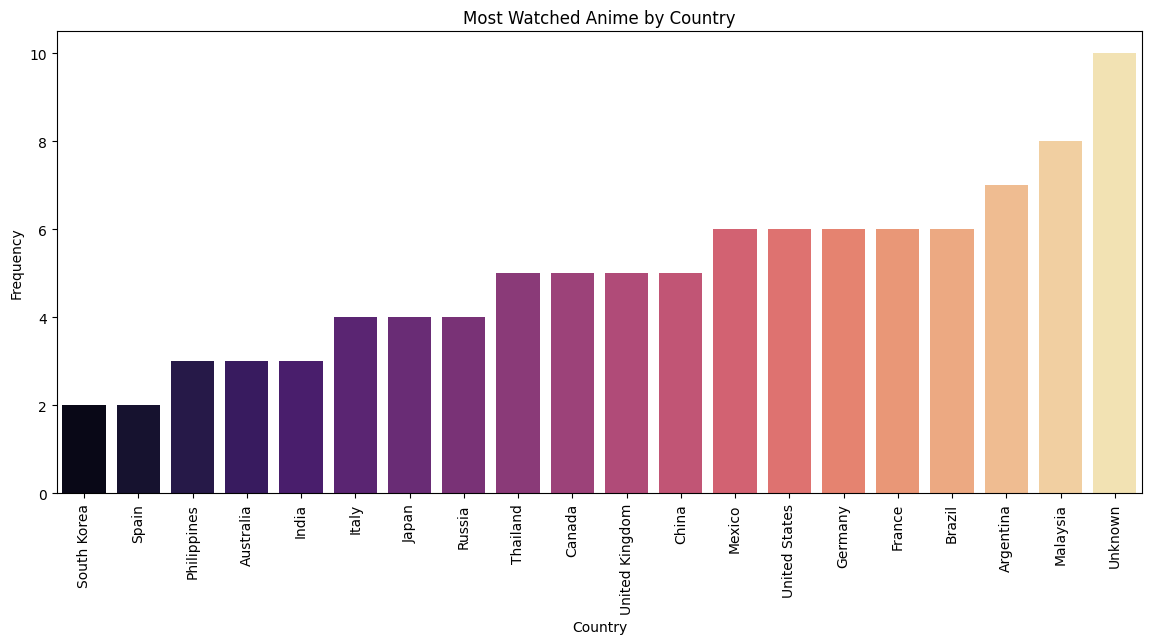

In [13]:
plt.figure(figsize=(14, 6))
top_anime_country = df['Most Watched in Country'].value_counts().sort_values(ascending=True)
sns.barplot(x=top_anime_country.index, y=top_anime_country.values, palette='magma')
plt.title('Most Watched Anime by Country')
plt.xlabel('Country')
plt.ylabel('Frequency')
plt.xticks(rotation=90)
plt.show()

## Bar Plot: Top 10 Highest Budget Anime  

- **Objective**:  
  - Identify and visualize the top 10 anime with the highest budgets.  

- **Plot Details:**  
  - **Data Selection (`nlargest(10, 'Budget (in Million USD)')`)**: Retrieves the top 10 anime based on budget.  
  - **Color Palette (`palette='plasma'`)**: Uses a vibrant gradient for clear distinction.  
  - **X and Y Labels**: Clearly define the budget values and corresponding anime titles.  

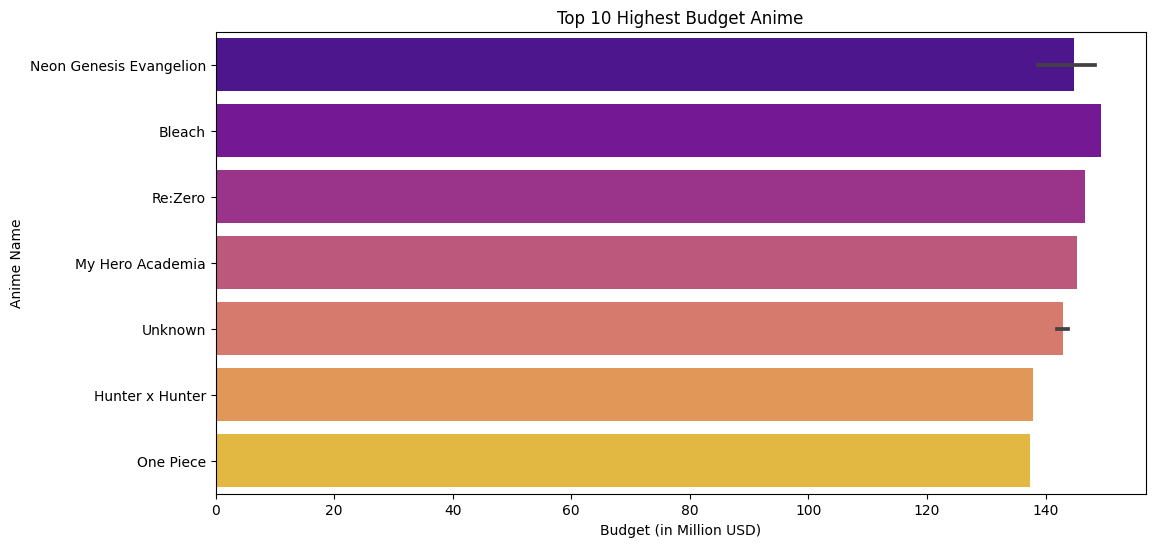

In [14]:
top_budget = df.nlargest(10, 'Budget (in Million USD)')

plt.figure(figsize=(12, 6))
sns.barplot(x='Budget (in Million USD)', y='Anime Name', data=top_budget, palette='plasma')
plt.xlabel('Budget (in Million USD)')
plt.ylabel('Anime Name')
plt.title('Top 10 Highest Budget Anime')
plt.show()

## Scatter Plot: Episode Count vs Ratings  

- **Objective**:  
  - Analyze the relationship between the number of episodes and anime ratings.  
  - Identify if longer series tend to have higher or lower ratings.  

- **Plot Details:**  
  - **X-axis**: Number of episodes.  
  - **Y-axis**: Anime ratings.  
  - **Hue (`hue='Genre'`)**: Different genres are color-coded for better category distinction.  
  - **Transparency (`alpha=0.7`)**: Improves visibility of overlapping points.  
  - **Color Palette (`palette='husl'`)**: Uses a diverse range of colors for clarity.  


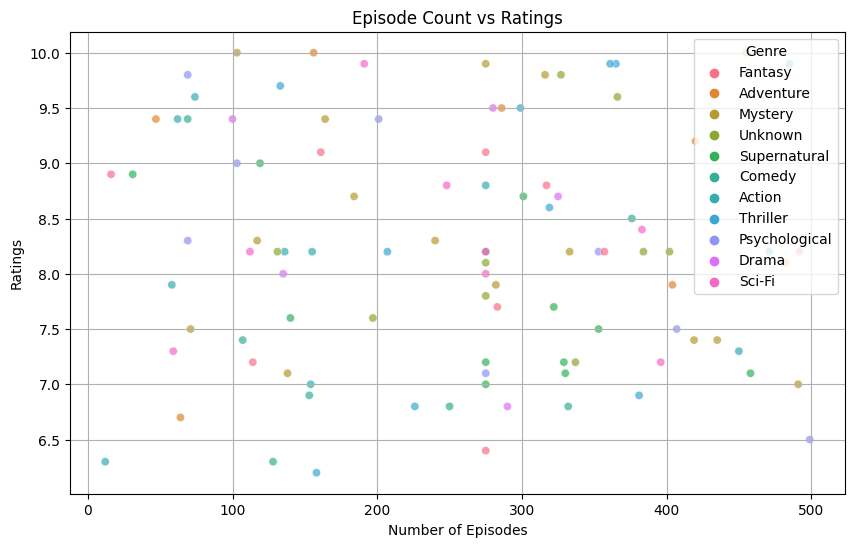

In [15]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Number of Episodes', y='Ratings', hue='Genre', data=df, alpha=0.7, palette='husl')
plt.xlabel('Number of Episodes')
plt.ylabel('Ratings')
plt.title('Episode Count vs Ratings')
plt.grid(True)
plt.show()

## Genre Popularity Across Top 10 Countries  

- **Objective**:  
  - Analyze the distribution of anime genres across the top 10 countries where they are most watched.  
  - Identify which genres are popular in different regions.  

- **Plot Details:**  
  - **Y-axis**: Different anime genres.  
  - **X-axis**: Count of anime in each genre.  
  - **Hue (`hue='Most Watched in Country'`)**: Differentiates the most watched anime genres by country.  
  - **Filtered Data (`top_countries`)**: Considers only the top 10 countries with the highest number of anime viewership.  
  - **Palette (`Set2`)**: Uses soft, distinguishable colors for better visualization.  
  - **Legend Placement (`bbox_to_anchor=(1, 1)`)**: Moves the legend outside for better readability.  


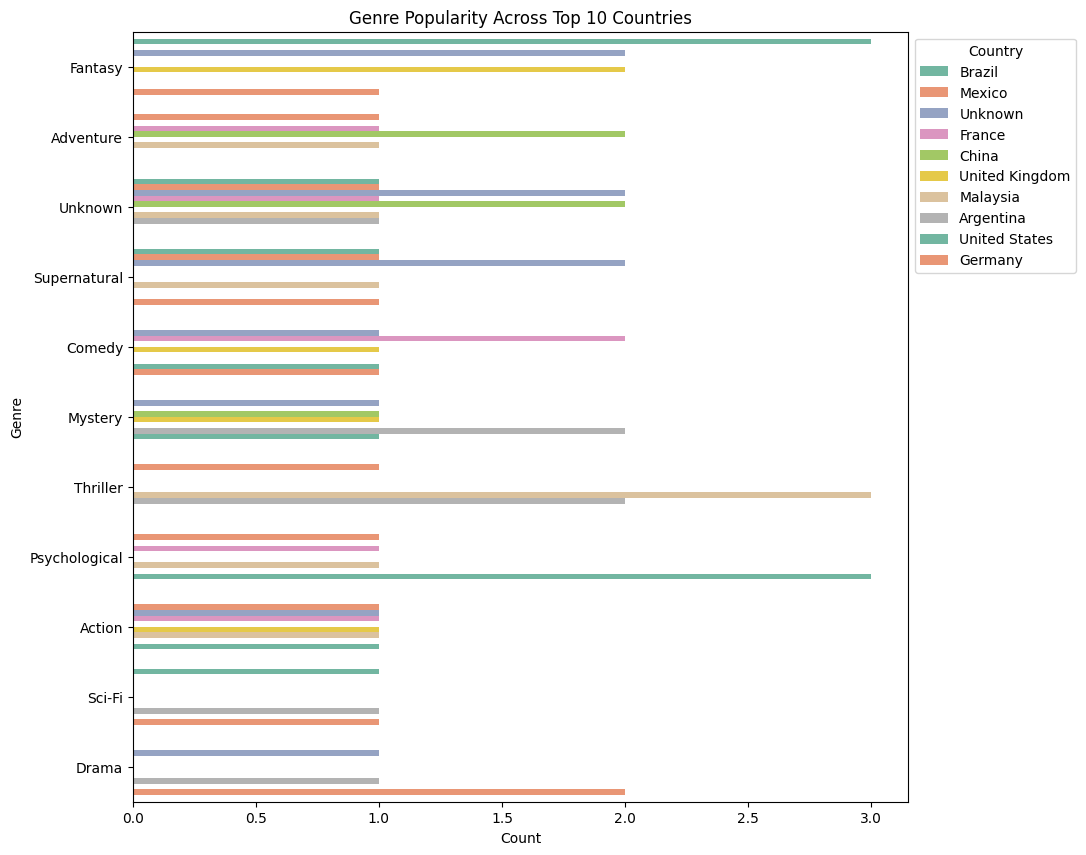

In [16]:
plt.figure(figsize=(10, 10))
top_countries = df['Most Watched in Country'].value_counts().head(10).index
filtered_df = df[df['Most Watched in Country'].isin(top_countries)]

sns.countplot(y='Genre', hue='Most Watched in Country', data=filtered_df, palette='Set2')
plt.xlabel('Count')
plt.ylabel('Genre')
plt.title('Genre Popularity Across Top 10 Countries')
plt.legend(title="Country", bbox_to_anchor=(1, 1))
plt.show()

## 📊 Top 10 Animation Studios by Average Rating

This visualization highlights the **top 10 animation studios** based on their **average ratings**. The data is sorted to ensure the highest-rated studio appears at the top for better readability.

## 🔹 Enhancements:
- **Sorted Studios in Descending Order** → Ensures the top-rated studio is at the top.
- **Better Readability**:
  - Larger text size for labels and titles.
  - Gridlines for clarity.
- **Improved Color Contrast** → Using the `"magma"` colormap.

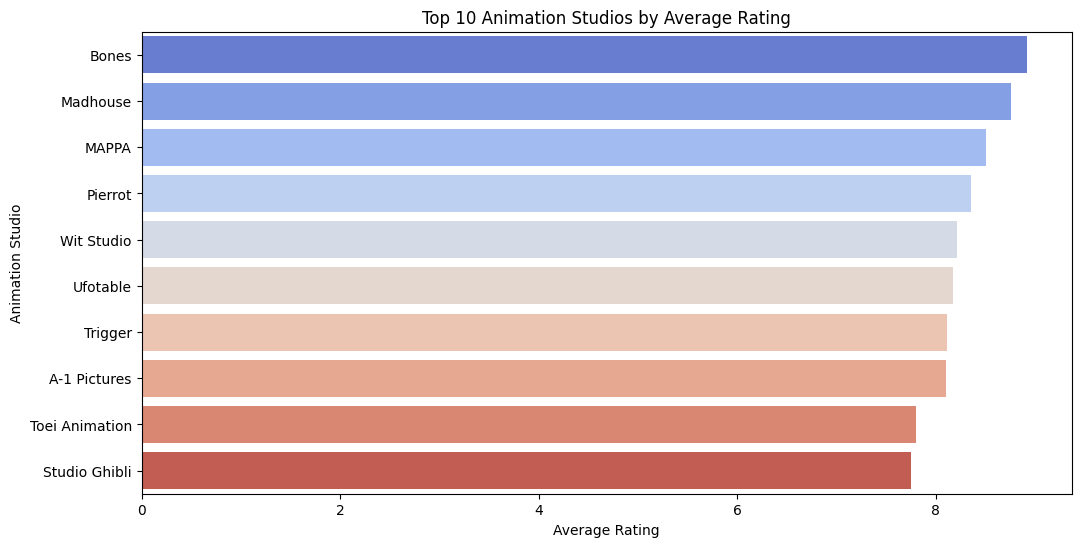

In [17]:
top_studios = df.groupby('Animation Studio Name')['Ratings'].mean().nlargest(10).reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(x='Ratings', y='Animation Studio Name', data=top_studios, palette='coolwarm')
plt.xlabel('Average Rating')
plt.ylabel('Animation Studio')
plt.title('Top 10 Animation Studios by Average Rating')
plt.show()

## Conclusion

From the various visualizations, we can derive the following insights about anime ratings, budget, genres, and popularity:


### 1. **Budget vs. Ratings**
   - There is **no clear correlation** between budget and ratings.
   - Some lower-budget anime have received high ratings, while certain high-budget productions may not always perform well in terms of audience reception.

### 2. **Most Common Genres**
   - Certain genres dominate the anime industry, with **Action, Adventure, and Fantasy** being the most prevalent.
   - These genres tend to attract large audiences due to their dynamic storytelling and world-building elements.

### 3. **Correlation Heatmap**
   - The correlation matrix reveals that **higher budgets do not necessarily lead to better ratings**.
   - The number of episodes may have a slight correlation with audience engagement but does not significantly impact ratings.

### 4. **Genre Distribution of Most Watched Anime**
   - Popular genres vary widely, but **Shonen and Isekai genres seem to have strong followings**.
   - Some genres have niche audiences but maintain a loyal viewer base.

### 5. **Most Watched Anime by Country**
   - Different countries favor different anime, showing the **regional preferences in anime consumption**.
   - Japan, the United States, and other major markets have distinct top choices.

### 6. **Top Budget Anime**
   - The top 10 highest-budget anime tend to be from **big studios**, often featuring detailed animation and CGI.
   - However, not all high-budget anime rank as the highest-rated, reinforcing the idea that quality content matters more than production costs.

### 7. **Episode Count vs. Ratings**
   - There is **no direct correlation between the number of episodes and ratings**.
   - Some long-running series perform well, while others decline in ratings over time.

### 8. **Genre Popularity Across Countries**
   - The preferred anime genres **vary by country**, reflecting cultural influences on anime consumption.
   - Certain countries favor action-packed series, while others prefer slice-of-life or psychological thrillers.

### 9. **Top Animation Studios by Average Rating**
   - The top studios maintain consistently **high average ratings**, indicating the importance of production quality and storytelling.
   - Studios like **Kyoto Animation, Madhouse, and Ufotable** are known for producing critically acclaimed anime.

### **Final Takeaway**
While budget and episode count do not guarantee success, **engaging storytelling, strong character development, and audience connection remain key factors in determining an anime's popularity and rating**. Additionally, **regional preferences play a major role in genre and anime selection**, highlighting the diversity in the anime industry.



## Personal opinion 

 ### **My Favorite Anime - Attack on Titan**
Among all anime, my personal favorite is **Attack on Titan**.  
It stands out due to its **incredible storytelling, breathtaking animation, and deep philosophical themes**.  
The series delivers intense action, shocking plot twists, and emotional depth, making it one of the most impactful anime of all time.  

### **What About You?**
I’d love to hear from you!  
**What is your favorite anime and why?**  
Is it because of the **story, characters, animation, or the emotional connection** you have with it?  
Let me know in the comments! 👇🔥  